# HOMEWORK 1 

## Question 1


For the first question we took help from Aris notes. In the notes it says, we can use following hash function method:

\begin{equation*}
\left( \sum_{k=1}^n a_k b_k \right) \mod prime number
\end{equation*}

Here a's are the coefficient of the each passw character. This coefficients are choosen uniformly between 0 to prime numbers. For this we write following function:


In [ ]:
def hash_function_coeff(number,length):
    hash_coeff=np.array([[random.randint(0,length-1) for i in range(20)]], dtype=object)
    for i in range(number-1):
        hash_coeff=np.concatenate((hash_coeff,np.array([[random.randint(0,n-1) for i in range(20)]])))
    return hash_coeff

Then for given false positive error rate,(we choose it as 0.01 for computational simplicity), we calculate the length of the bloomfilter and numbers hash function for his specific false positive error rate.
As a bloom filter length we found 958505837 . But for modulo function we have to have a prime number thats why we choose the closest prime number which is 958505839. 
We also check whether our hash functions generates uniformly distributed hash values along our bloom filter and result is below:


<img src="index.png">

Whole code for the task is below:


In [ ]:
import numpy as np
import random
import math
import time
import pickle
with open("../homeworks/ADM-HW4/passwords1.txt","r") as f:
    text=f.read()
text=text.split("\n")
text = text[:-1]
random.seed(1024)

# hash_function_coeff function create specified number of hash function and
# choose coefficient of our hash function between range 0:closest prime number-1
def hash_function_coeff(number,length):
    hash_coeff=np.array([[random.randint(0,length-1) for i in range(20)]], dtype=object)
    for i in range(number-1):
        hash_coeff=np.concatenate((hash_coeff,np.array([[random.randint(0,n-1) for i in range(20)]])))
    return hash_coeff
##hashing function calculates hash values for each password and change the bloomfilter indexes into 1
def hashing(coeffs,text):
    for idx,passw in enumerate(text):
        ord_of_words=[]
        for alph in passw:
            ord_of_words.append(ord(alph))
        ord_of_words=np.array(ord_of_words, dtype=object)
        for coeff in coeffs:
            try:
                result=np.remainder(np.sum(coeff*ord_of_words),closeset_prime)
                bloom_filter[result]=1
            except Exception as e1:
                print(e1)
                print(idx)
        if idx % 1000000 == 0:
            print("{} of them handled and saved.Keep going".format(idx))
            if idx % 10000000 == 0:
                np.save("bloom_filter.npy", bloom_filter)
    np.save("bloom_filter.npy", bloom_filter)
## this control_hash function check whether an element inside of a bloom filter or not and return 2 lists of
##  surely not inside items and not sure but probably inside the list
def control_hash(coeffs,pass2,bloom_filter):
    not_inside=[]
    question_possitive=[]
    for idx,passw in enumerate(pass2):
        if idx % 10000 == 0:
            print(len(not_inside))
        ord_of_words=[]
        for alph in passw:
            ord_of_words.append(ord(alph))
        ord_of_words = np.array(ord_of_words, dtype=object)
        flag=1
        for coeff in coeffs:
            result=np.remainder(np.sum(coeff*ord_of_words),closeset_prime)
            if not bloom_filter[result]:
                not_inside.append(idx)
                flag = 0
                break
        if flag:
            question_possitive.append(idx)

    return(not_inside,question_possitive)

#number of element inserted
n=len(text)
print(n)
# p is the false possitive rate
p=0.01
# number of filter that bloom need
m=-(n*np.log(p))/np.square(np.log(2))
closeset_prime=958505839
## k number of hash function
k=(closeset_prime/n)*np.log(2)
print(m)
print(closeset_prime)
bloom_filter=np.zeros(closeset_prime,dtype=np.int)
coeff=hash_function_coeff(math.ceil(k),closeset_prime)

start=time.time()
hashing(coeff,text)
with open("../homeworks/ADM-HW4/passwords2.txt", "r") as f:
    text=f.read()
text=text.split("\n")
text = text[:-1]
print(len(text))

print("It starts controll other list wait")
results=control_hash(coeff,text,bloom_filter)
end=time.time()

print("Bloom filter length",closeset_prime)
print("number of hash function",math.ceil(k))
print("Number of elemnts",n)
print("Probability of false positive",p)
print('Number of duplicates detected: ', len(results[1]))
print('Notinside ', len(results[0]))
print(end-start)
with open('parrot.pkl', 'wb') as f:
    pickle.dump(results, f)


Result of out codes is as shown below:


<img src="Picture1.png">

Out of 39000000 password, 24748554 of them for surely not in the passwd1.txt. But 14251446 of them labeled as included in password1.txt but because of the collision probability, not all of them inside passwd1.txt.(What we expect is nearly 145.000 of them not inside passwd1.txt). Our codes done every steps in 2 hours 30 minutes which we believe it is  a good score.

# Question 3

In [1]:
import pandas as pd
import seaborn as sns
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA #lybrary used to an analysis of Principal Components
from sklearn.preprocessing import normalize 
from sklearn import preprocessing

In [2]:
import ast

vectors_list = []
with open('C:\\Users\\Admin\\Downloads\\wine.data') as file:
    for line in file:
        l = line.strip('\n')
        x = ast.literal_eval(l)
        vectors_list.append(list(x))

__Normalization and Standardization:__ <br> We know that k-means works with euclidean distance of point and custers's centres. So basically we can imagine k-means working on rounds. <br> If we use datas as they are, especially if we don't know nothing of them, we risk to give too much weight on elements that has a small variance, and this can false the right working of custering

In [3]:
n = normalize(vectors_list, axis=1) #we do this to have a better response by our data to custering 
s = preprocessing.scale(n)
v_list = []
for el in list(s):          #in this way we convert the array uotput in a nested list
    v_list.append(list(el))

Now we want to have just a view of our dataset, and for this puorpose we use PCA analysis, reducing dataset to N=2 and N=3, even if we are going to work later using k-means on a N=14 dataset

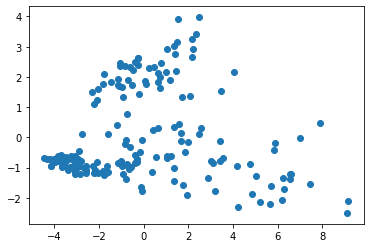

In [4]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(v_list)
t = reduced.transpose()

plt.scatter(t[0], t[1])
plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


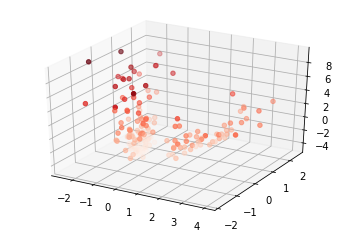

In [5]:
from mpl_toolkits import mplot3d
pca = PCA(n_components=3)
reduced = pca.fit_transform(v_list)
fig = plt.figure()
t = reduced.transpose()

plt.scatter(t[0], t[1])
ax = plt.axes(projection='3d')

zdata = t[0]
xdata = t[1]
ydata = t[2]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds')

In [6]:
def eu_dist(v1,v2):
    distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(v1, v2)])) #calculating for each component
    return distance 

def totalcosts(res):
    Tot_sum = 0
    for i in range(len(res[0])):
        for el in range(len(res[0][i])):
            Tot_sum += eu_dist(res[0][i][el],res[1][i]) #in res[1][i] we find final centres
    return Tot_sum #sum of the distances of all points and their centres

def squareddist(res):
    Tot_sum = 0
    for i in range(len(res[0])):
        for el in range(len(res[0][i])):
            Tot_sum += (eu_dist(res[0][i][el],res[1][i]))**2 
    return Tot_sum 
 

In [7]:
def clustering(k,clusters,vectors_list):
    count = 0                 #var to count in how many steps the algorithm reach the solution

    Final_clusters = []       #it will be a nested list, each sublist is a cluste
    final_mean = []           #here we store last values of centres

    l = []                       # ex : l=[mean1,mean2], used in while cycle to assign points to clusters 
    for i in range(k):
        l.append(clusters[i])

    mean_list = [l]

    var = True
    while var :

        c_dict = {}        #this dict is use to store temporary clusters of the i-th iteration
        for n in range(k):
            c_dict[n]=[]   #each key is a cluster, then we'll fill each one with its closest points

        for i in vectors_list:
            l_temp = []
            for j in range(len(l)):
                l_temp.append(eu_dist(i,l[j])) #store the distance between the sublists and all centres 

            minimum = min(l_temp)       #find the closest array for this sublist list
            ind = l_temp.index(minimum) #find in which cluster it shoul be

            c_dict[ind].append(i)  #each key of the dict is a number from 0 to k-1, so we store each sublist in the right cluster

        l_temp = []
        for n in range(k):
            arr = np.array(c_dict[n]) #c1_ = np.array(c[0])
            mean = list(np.mean(arr, axis = 0, dtype=np.float64)) #mean vector for each
            l_temp.append(mean)

        mean_list.append(l_temp)

        l = l_temp

        #print(mean_list[-2])
        #print(mean_list[-1])
        if mean_list[-2] == mean_list[-1]: #if the last mean is equeal to the previus last one, the mean is not chenging anymore,
                                           # so clusters are not changing continuing to iterate. We stop the algorithm
            for i in range(k):
                Final_clusters.append(c_dict[i]) #we take last clusters we build
            final_mean = mean_list[-1]           #we have memory of the last centres
            var = False
        count += 1
    print('Done In ',count,' steps')
    return [Final_clusters, final_mean]

In [8]:
cost_list = []

################################## K = 1 #################################################

Clusters1 = random.choices(v_list, k = 1) #cluster has to be assigned outside of function, because of worrking of random.choise
res1 = clustering(1,Clusters1,v_list)
totcosts1 = totalcosts(res1)
cost_list.append(totcosts1)

################################## K = 2 #################################################

Clusters2 = random.choices(v_list, k = 2) 
res2 = clustering(2,Clusters2,v_list)
totcosts2 = totalcosts(res2)
cost_list.append(totcosts2)

################################## K = 3 #################################################

Clusters3 = random.choices(v_list, k = 3) 
res3 = clustering(3, Clusters3,v_list)
totcosts3 = totalcosts(res3)
cost_list.append(totcosts3)

################################## K = 4 ################################################

Clusters4 = random.choices(v_list, k = 4) 
res4 = clustering(4, Clusters4,v_list)
totcosts4 = totalcosts(res4)
cost_list.append(totcosts4)

################################## K = 5 ################################################

Clusters5 = random.choices(v_list, k = 5) 
res5 = clustering(5, Clusters5,v_list)
totcosts5 = totalcosts(res5)
cost_list.append(totcosts5)

################################## K = 6 ################################################

Clusters6 = random.choices(v_list, k = 6) 
res6 = clustering(6, Clusters6,v_list)
totcosts6 = totalcosts(res6)
cost_list.append(totcosts6)

################################## K = 7 ################################################

Clusters7 = random.choices(v_list, k = 7) 
res7 = clustering(7, Clusters7,v_list)
totcosts7 = totalcosts(res7)
cost_list.append(totcosts7)

################################## K = 8 ################################################

Clusters8 = random.choices(v_list, k = 8) 
res8 = clustering(8, Clusters8,v_list)
totcosts8 = totalcosts(res8)
cost_list.append(totcosts8)

################################## K = 9 ################################################

Clusters9 = random.choices(v_list, k = 9)
res9 = clustering(9, Clusters9,v_list)
totcosts9 = totalcosts(res9)
cost_list.append(totcosts9)

################################## K = 10 ################################################

Clusters10 = random.choices(v_list, k = 10) 
res10 = clustering(10, Clusters10,v_list)
totcosts10 = totalcosts(res10)
cost_list.append(totcosts10)

################################## K = 11 ################################################

Clusters11 = random.choices(v_list, k = 11) 
res11 = clustering(10, Clusters11,v_list)
totcosts11 = totalcosts(res11)
cost_list.append(totcosts11)

Done In  2  steps
Done In  6  steps
Done In  9  steps
Done In  5  steps
Done In  8  steps
Done In  12  steps
Done In  6  steps
Done In  9  steps
Done In  13  steps
Done In  11  steps
Done In  14  steps


[605.086061257214, 457.5105863857009, 368.8900219726529, 328.05120809553904, 303.6829953543403, 286.9298814409077, 279.9083756087972, 273.4798735481721, 270.1527327104898, 262.4924784351123, 260.9389370274011]


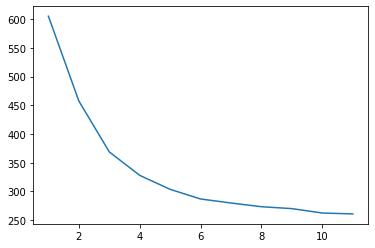

In [11]:
print(cost_list)

k_list = [1,2,3,4,5,6,7,8,9,10,11]
print(plt.plot(k_list, cost_list))

We computed clustering from __k=1 to k=11__ calculating also the sum of squared distance of each point from his center, to identify the _'elbow'_ in this graph. <br> __This value of k shoul be the best value for custering this datas__ <br> We noticed that is not so clear which k is the best choise so we take in exam values from k =2 to k = 4:
__In particular we take the best result of each K clustering (chosing the lowest value of squared dist)__ <br>
__Then for each cluster we look at correlation of all variables of the vectors and in this way we choose the best result__

#  K = 2

In [12]:
results2 = []
costs2 = []
for k in range(10):
    Clusters2 = random.choices(v_list, k = 2) #two clusters, don't work with an assignement of k outside the line
    res2 = clustering(2, Clusters2,v_list)
    totcosts2 = squareddist(res2)
    results2 +=[res2[0]]
    costs2.append(totcosts2)

Done In  5  steps
Done In  7  steps
Done In  5  steps
Done In  7  steps
Done In  7  steps
Done In  8  steps
Done In  6  steps
Done In  4  steps
Done In  7  steps
Done In  5  steps


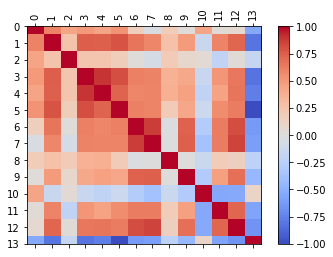

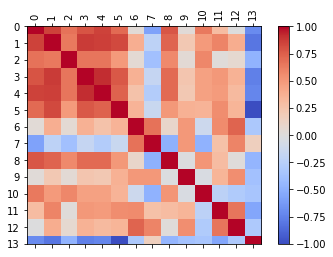

In [14]:
i = costs2.index(min(costs2)) #best result for different K=2 clustering
optimal2 = results2[i]

c1 = optimal2[0]; c2 = optimal2[1]; 
df1 = pd.DataFrame(c1) ; Df1 = df1[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
df2 = pd.DataFrame(c2) ; Df2 = df2[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

cor1 = Df1.corr() #Calculate the correlation of the above variables
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor1,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(Df1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Df1.columns)
ax.set_yticklabels(Df1.columns)
plt.show()

cor2 = Df2.corr() #Calculate the correlation of the above variables
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor2,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(Df2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Df2.columns)
ax.set_yticklabels(Df2.columns)
plt.show()

# K = 3

In [15]:
results3 = []
costs3 = []
for k in range(10):
    Clusters3 = random.choices(v_list, k = 3) #two clusters, don't work with an assignement of k outside the line
    res3 = clustering(3, Clusters3,v_list)
    totcosts3 = squareddist(res3)
    results3 +=[res3[0]]
    costs3.append(totcosts3)

Done In  11  steps
Done In  10  steps
Done In  12  steps
Done In  10  steps
Done In  8  steps
Done In  11  steps
Done In  9  steps
Done In  6  steps
Done In  7  steps
Done In  7  steps


913.5508894687196


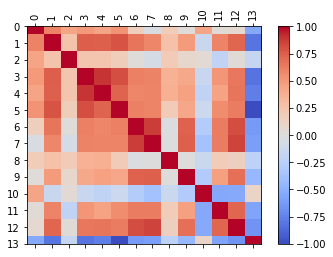

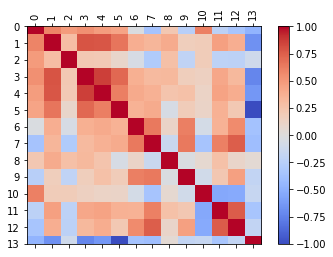

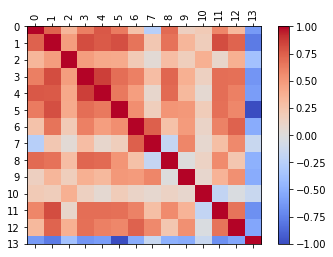

In [16]:
i = costs3.index(min(costs3)) #best result for different K=3 clustering
print(costs3[i])
optimal3 = results3[i]

c3 = optimal3[0]; c2 = optimal3[1]; c3 = optimal3[2]
df1 = pd.DataFrame(c1) ; Df1 = df1[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
df2 = pd.DataFrame(c2) ; Df2 = df2[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
df3 = pd.DataFrame(c3) ; Df3 = df3[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

cor1 = Df1.corr() #Calculate the correlation of the above variables
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor1,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(Df1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Df1.columns)
ax.set_yticklabels(Df1.columns)
plt.show()

cor2 = Df2.corr() #Calculate the correlation of the above variables
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor2,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(Df2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Df2.columns)
ax.set_yticklabels(Df2.columns)
plt.show()

cor3 = Df3.corr() #Calculate the correlation of the above variables
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor3,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(Df3.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Df3.columns)
ax.set_yticklabels(Df3.columns)
plt.show()

# K = 4

In [18]:
results = []
costs = []
for k in range(10):
    Clusters4 = random.choices(v_list, k = 4) #two clusters, don't work with an assignement of k outside the line
    res4 = clustering(4, Clusters4,v_list)
    totcosts4 = squareddist(res4)
    results +=[res4[0]]
    costs.append(totcosts4)

Done In  11  steps
Done In  7  steps
Done In  8  steps
Done In  10  steps
Done In  9  steps
Done In  13  steps
Done In  7  steps
Done In  6  steps
Done In  5  steps
Done In  6  steps


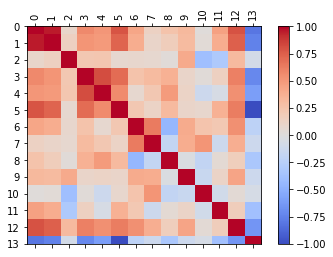

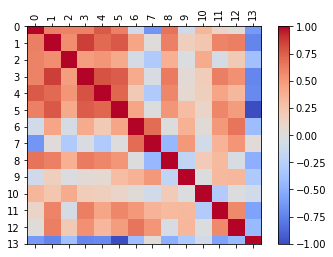

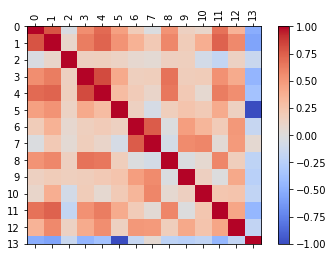

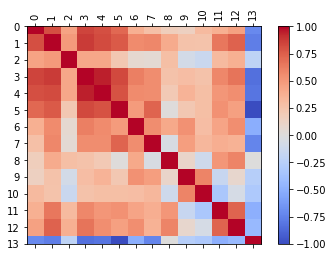

In [20]:
i = costs.index(min(costs))
optimal4 = results[i]

c1 = optimal4[0]; c2 = optimal4[1]; c3 = optimal4[2]; c4 = optimal4[3]
df1 = pd.DataFrame(c1) ; Df1 = df1[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
df2 = pd.DataFrame(c2) ; Df2 = df2[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
df3 = pd.DataFrame(c3) ; Df3 = df3[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
df4 = pd.DataFrame(c4) ; Df4 = df4[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

cor1 = Df1.corr() #Calculate the correlation of the above variables
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor1,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(Df1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Df1.columns)
ax.set_yticklabels(Df1.columns)
plt.show()

cor2 = Df2.corr() #Calculate the correlation of the above variables
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor2,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(Df2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Df2.columns)
ax.set_yticklabels(Df2.columns)
plt.show()

cor3 = Df3.corr() #Calculate the correlation of the above variables
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor3,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(Df3.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Df3.columns)
ax.set_yticklabels(Df3.columns)
plt.show()

cor4 = Df4.corr() #Calculate the correlation of the above variables
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor4,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(Df4.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Df4.columns)
ax.set_yticklabels(Df4.columns)
plt.show()

# Conclusions

Is not possible to visualize our dataset in the space, because we don't have the knoledge to visualize a N=14 dimension space. So  basically we try to do it indirectly. Especially to understand the quality of our clusters. <br> 
__We graph correlation for each cluster for each K of different computation of K means.__ <br>
__In conclusion__ The best clusters seems to be both k = 4 and k = 3 even if the plot suggests us that is for k = 3 that we indetify the _elbow_ in the graph. <br> (Even if, qualitatively, for K = 4 seems to be a bit better)